## Teaching file
## Steganography Voila Application
Note: Images and supporting text files for reading and writing need to be plaed in the './images/' folder. <br>
Open Source BSD 3-Clause License, 2020 and 2021, Author: William (Rick) Weitzel <br>
Please see license file and ReadMe file for further instructions.

In [1]:
# BSD 3-Clause License
# Copyright (c) 2020 and 2021
# Author: William (Rick) Weitzel

# Redistribution and use in source and binary forms, with or without
# modification, are permitted provided that the following conditions are met:

# 1. Redistributions of source code must retain the above copyright notice, this
#    list of conditions and the following disclaimer.

# 2. Redistributions in binary form must reproduce the above copyright notice,
#    this list of conditions and the following disclaimer in the documentation
#    and/or other materials provided with the distribution.

# 3. Neither the name of the copyright holder nor the names of its
#    contributors may be used to endorse or promote products derived from
#    this software without specific prior written permission.

# THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"
# AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE
# IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
# DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE
# FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL
# DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR
# SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER
# CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY,
# OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE
# OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.



In [2]:
print("Loading libraries and importing functions.") 
# load libraries
import steg_lib as sl
import matplotlib.pyplot as plt 
import numpy as np 
import os
import io
from PIL import Image
import ipywidgets as widgets
from ipywidgets import interact


Loading libraries and importing functions.


In [3]:
# define directory and type of image file to be used
file_directory = './images/'
substring = '.tiff'

In [4]:
# generate file list from file_directory (with exception handling)
file_list = []
try:
    all_files = os.listdir(file_directory)
except:
    print('something wrong with your directory')
for i in range(0,len(all_files)):
    if substring in all_files[i]:
        file_list.append(all_files[i])
if len(file_list) == 0:
    print('no files with this specification')
    print('place .tiff image file(s) in directory and try again')
file_list.sort() # needed to correct os.listdir() order
file_list

['coded_image.tiff', 'subset_sunset.tiff']

In [5]:
output = widgets.Output()

button_select_file = widgets.Button(
    description="Click to confirm selected file",
    layout=widgets.Layout(width='50%',),
    icon='check')

file_select = widgets.Dropdown(
    options = file_list,
    value = file_list[0],
    description = 'Select File:',
    disabled = False,
    )

@output.capture(clear_output=False,wait=True)
def on_button1_clicked(b):
    global pic_array, im, pic_array
    im = Image.open(file_directory + file_select.value)
    pic_array = np.array(im)[:,:,:3] #drop the alpha channel, if present
    button_select_file.description = 'picture loaded'
    print("you selected: ", file_select.value)

button_select_file.on_click(on_button1_clicked)

display(file_select, button_select_file)
output

Dropdown(description='Select File:', options=('coded_image.tiff', 'subset_sunset.tiff'), value='coded_image.ti…

Button(description='Click to confirm selected file', icon='check', layout=Layout(width='50%'), style=ButtonSty…

Output()

In [6]:
output = widgets.Output()

input_message = widgets.Textarea(
    value='Starter message - edit as you like',
    placeholder='Type something',
    description='Message:',
    disabled=False,
    rows=1,
    layout=widgets.Layout(width='75%'))

button_check_message = widgets.Button(
    style = {'description_width': 'initial'},
    description='Check input message',
    tooltip='Click to display input message',
    layout=widgets.Layout(width='50%'),
    icon='check')

@output.capture(clear_output=True,wait=True)
def on_button2_clicked(_):
    button_check_message.description='Message checked'
    print(input_message.value)

button_check_message.on_click(on_button2_clicked)

display(button_check_message, input_message)
output


Button(description='Check input message', icon='check', layout=Layout(width='50%'), style=ButtonStyle(), toolt…

Textarea(value='Starter message - edit as you like', description='Message:', layout=Layout(width='75%'), place…

Output()

In [7]:
# insert binary segment in image

start_integer = widgets.IntText(
    value=42,
    description='Enter start location:',
    style = {'description_width': 'initial'},
    disabled=False
)

button_insert_message = widgets.Button(
    style = {'description_width': 'initial'},
    description='insert message in picture',
    tooltip='Click to insert message',
    icon='check',
    layout=widgets.Layout(width='75%'))

output = widgets.Output()

@output.capture(clear_output=False,wait=True)
def insert_message(image, message, start_loc):
    global str_message_length
    (binary_message, str_message_length) = sl.convert(message)
    (image_vector, carrier_segment, length_of_binary, 
        rows, cols, colors) = sl.prepare_carrier_segment(image, 
        binary_message, start_loc)
    coded_image_segment = sl.insert_message(carrier_segment, 
        binary_message, length_of_binary)
    coded_image_vector = sl.insert_coded_segment(image_vector,
        coded_image_segment,start_loc)
    coded_image = sl.get_coded_image(coded_image_vector,rows,cols,colors)
    # save new image with message, provide message length
    plt.imsave(file_directory + 'coded_image.tiff',coded_image, format = 'tiff')
    s = str(str_message_length)
    output_text = 'Message string length is: ' + s \
        + '\n and message start location is: ' + str(start_loc) \
        + '\n and the Message is : \n' + message 
    f = open(file_directory + 'message_info','w')
    f.write(output_text)
    f.close()
    
@output.capture(clear_output=True,wait=True)
def on_button4_clicked(_):
    start_int = int(start_integer.value)
    insert_message(pic_array, input_message.value, start_int)
    button_insert_message.description = 'binary message inserted'
    print("Message inserted, see 'coded_image.tiff' in " + file_directory)
    print('Message str length = ', str_message_length)
    print('Start location = ', start_int)
    print("and please see 'message_info' file in " + file_directory)

button_insert_message.on_click(on_button4_clicked)

display(start_integer, button_insert_message)
output


IntText(value=42, description='Enter start location:', style=DescriptionStyle(description_width='initial'))

Button(description='insert message in picture', icon='check', layout=Layout(width='75%'), style=ButtonStyle(),…

Output()

In [8]:
# decode the image
output = widgets.Output()

provide_start_integer = widgets.IntText(
    value=42,
    description='Enter start location:',
    style = {'description_width': 'initial'},
    disabled=False
)

provide_message_length = widgets.IntText(
    value=42,
    description='Enter message length:',
    style = {'description_width': 'initial'},
    disabled=False
)

button_read_message = widgets.Button(
    style = {'description_width': 'initial'},
    description='read message from picture',
    tooltip='Click to read message',
    icon='check',
    layout=widgets.Layout(width='75%'))

@output.capture(clear_output=True,wait=True)
def read_message(start_loc, message_length):
    global decoded_message, coded_image_segment, coded_image
    coded_image = plt.imread(file_directory + 'coded_image.tiff')
    coded_image = coded_image[:,:,:3]
    coded_image_segment = sl.get_coded_image_segment(coded_image,start_loc,message_length)
    binary_message = sl.extract_binary_message(coded_image_segment)
    decoded_message = sl.convert_back(binary_message)
    f = open(file_directory + 'decoded_message','w')
    f.write(decoded_message)
    f.close()
    
@output.capture(clear_output=True,wait=True)
def on_button5_clicked(_):
    start = int(provide_start_integer.value)
    length = int(provide_message_length.value)
    read_message(start, length)
    button_read_message.description = 'message decoded'
    print(decoded_message)
    print("also see 'decoded_message' file ")

button_read_message.on_click(on_button5_clicked)

display(provide_start_integer, provide_message_length, button_read_message)
output


IntText(value=42, description='Enter start location:', style=DescriptionStyle(description_width='initial'))

IntText(value=42, description='Enter message length:', style=DescriptionStyle(description_width='initial'))

Button(description='read message from picture', icon='check', layout=Layout(width='75%'), style=ButtonStyle(),…

Output()

# Begin teaching components / illustrations

In [9]:
# what files to we have?
os.listdir()

['new5_voila_app_TEACHING_FILE.ipynb',
 '.DS_Store',
 'requirements.txt',
 'images',
 'steg_lib.py',
 '__pycache__',
 'env',
 'notes',
 '.ipynb_checkpoints',
 'new5_voila_app.ipynb']

In [10]:
# load teaching data 

# define directory and type of image file to be used
file_directory = './images/'
substring = '.tiff'
# load image into numpy array
file_select.value = 'subset_sunset.tiff'
im = Image.open(file_directory + file_select.value)
pic_array = np.array(im)[:,:,:3]

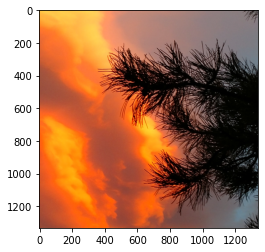

In [11]:
plt.imshow(pic_array)

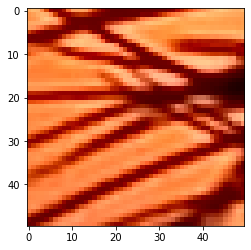

In [12]:
zoom_in_pic = pic_array[400:450,400:450,:]
plt.imshow(zoom_in_pic)

In [13]:
#how big is zoom_in_pic?
print(zoom_in_pic.shape, \
      zoom_in_pic.shape[0]*zoom_in_pic.shape[1]*zoom_in_pic.shape[2], 'pixels')

(50, 50, 3) 7500 pixels


((4, 8, 3), <matplotlib.image.AxesImage at 0x7fbe0aa243a0>)

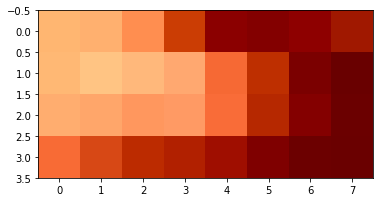

In [14]:
# let's zoom in a bit more
itty_bitty_pic = pic_array[401:405,403:411,:]
itty_bitty_pic.shape, plt.imshow(itty_bitty_pic)

(<matplotlib.image.AxesImage at 0x7fbe0ab4dc70>,
 array([[[255, 182, 113]]], dtype=uint8))

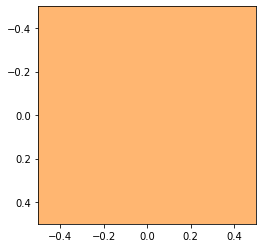

In [15]:
# let's look a the upper left pixel
plt.imshow(itty_bitty_pic[0:1,0:1,:]), itty_bitty_pic[0:1,0:1,:]

## let's start to work with text, integers, ordinal, and binary data type (formats) 

In [16]:
# Ordinal numbers:
# indicate the exact position of, or order or things in a list
# e.g. 1st, 2nd, 3rd, thing and so on
# ord() function evalutes a charactor and gives it
# a value between 0 and 256-1 (8 bit)

In [17]:
letter1 = '\n' # new line for print
letter2 = 'n'
letter3 = 'a'
ord(letter1), ord(letter2), ord(letter3)

(10, 110, 97)

In [18]:
print(ord('0'), ord('1'), ord('2'), ord('3'), \
      '\n', ord('A'),ord('B'), ord('C'), \
      '\n', ord('a'), ord('b'), ord('c'))

48 49 50 51 
 65 66 67 
 97 98 99


In [19]:
# inverse of ord() is chr()

In [20]:
chr(48), chr(0), chr(10), chr(33), chr(35), chr(65), \
    chr(97), chr(150), chr(253), chr(254), chr(255) 

('0', '\x00', '\n', '!', '#', 'A', 'a', '\x96', 'ý', 'þ', 'ÿ')

In [21]:
print(chr(48), chr(0), chr(10), chr(33), chr(35), chr(65), \
        chr(97), chr(150), chr(253), chr(254), chr(255))

0   
 ! # A a  ý þ ÿ


In [22]:
chr(255)

'ÿ'

In [23]:
# convert to binary - Method 1
bin(10)

'0b1010'

In [24]:
# convert to binary - Method 2
format(ord(letter1),'08b'), format(ord(letter2),'08b'), format(ord(letter3),'08b')

('00001010', '01101110', '01100001')

In [25]:
thing = format(ord(letter3),'08b')
thing, ord(letter3), letter3

('01100001', 97, 'a')

In [26]:
int(thing) # converts string to integer

1100001

In [27]:
# interstingly int() can be supplied with 
# the base of the number being converted !!
# to convert binary values (base 2) use int(value, 2)
int(thing,2), chr(int(thing,2))

(97, 'a')

In [28]:
a_bin = format(ord('a'),'08b')
b_bin = format(ord('b'),'08b')
c_bin = format(ord('c'),'08b')
d_bin = format(ord('d'),'08b')
binary_abcd = a_bin + b_bin + c_bin + d_bin # nice thing about adding strings together
binary_abcd, type(binary_abcd)

('01100001011000100110001101100100', str)

In [29]:
binary_mes, mes_str_length = sl.convert('abcd') # using the function in steg_lib
binary_mes, mes_str_length

('01100001011000100110001101100100', 4)

## let's look at the image values converted to binary The plan is to encode the least significant bit with the binary values from the message into the image

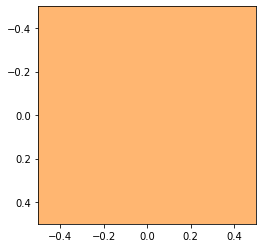

In [30]:
plt.imshow(itty_bitty_pic[0:1,0:1,:])

In [31]:
[i for i in itty_bitty_pic[0,0,:]] 

[255, 182, 113]

In [32]:
[format(i, '08b') for i in itty_bitty_pic[0,0,:]]  #notice getting element, not slicing

['11111111', '10110110', '01110001']

In [33]:
decoded_from_bin = sl.convert_back(binary_abcd) # using the function from steg-lib
decoded_from_bin

'abcd'

In [34]:
message = "hi there"
binary_message, string_message_length = sl.convert(message)
binary_message, string_message_length

('0110100001101001001000000111010001101000011001010111001001100101', 8)

In [35]:
# Now for the Code Outline:
# 1. take a string message and convert it to binary
# 2. take an image and convert the number of pixels
# that will hold the number of digits in the 
# binary message (need starting point).
# 3. convert those pixels to binary, and write the 
# binary message, bit by bit (0,1) in the least significant 
# bit of the 8 bit number.
# 4. convert those (image with message) pixels back to uint8 numbers and replace
# the image segment with the slighlty changed values 
# (e.g. from 147 to 146) that are imperceptible 

In [36]:
format(147,'08b'), format(146,'08b') # effect of changing least significant bit

('10010011', '10010010')

## let's resume working with images (inserting the message)

In [37]:
# enter input message value
input_message.value = 'Hi Python!'
# provide start location for message insertion
start_loc = 0
# provide message length
message_length = len(input_message.value)

In [38]:
# make binary message 
binary_message, str_message_length = sl.convert(input_message.value)
print ('binary_message ',binary_message, '\n', \
       'len(binary_message) = ', len(binary_message), '\n', \
       'str_message_length ', str_message_length)


binary_message  01001000011010010010000001010000011110010111010001101000011011110110111000100001 
 len(binary_message) =  80 
 str_message_length  10


In [39]:
# teeny_tiny_pic = np.random.randint(255, size=(4, 8, 3))
# OR
teeny_tiny_pic = np.full((4, 8, 3), 150, dtype = np.uint8)

In [40]:
teeny_tiny_pic.shape

(4, 8, 3)

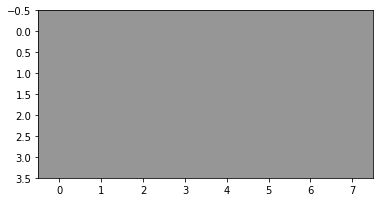

In [41]:
plt.imshow(teeny_tiny_pic)

In [42]:
start_loc = 0
image_vector, carrier_segment, length_of_binary, \
    rows, cols, colors = sl.prepare_carrier_segment(teeny_tiny_pic, \
        binary_message, start_loc)

In [43]:
len(image_vector), len(carrier_segment), length_of_binary

(96, 80, 80)

In [44]:
coded_image_segment = sl.insert_message(carrier_segment, binary_message, length_of_binary)

In [45]:
len(coded_image_segment)

80

In [46]:
# the original data from the image
carrier_segment

array([150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150,
       150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150,
       150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150,
       150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150,
       150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150,
       150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150,
       150, 150], dtype=uint8)

In [47]:
# after the message has been inserted
coded_image_segment

array([150, 151, 150, 150, 151, 150, 150, 150, 150, 151, 151, 150, 151,
       150, 150, 151, 150, 150, 151, 150, 150, 150, 150, 150, 150, 151,
       150, 151, 150, 150, 150, 150, 150, 151, 151, 151, 151, 150, 150,
       151, 150, 151, 151, 151, 150, 151, 150, 150, 150, 151, 151, 150,
       151, 150, 150, 150, 150, 151, 151, 150, 151, 151, 151, 151, 150,
       151, 151, 150, 151, 151, 151, 150, 150, 150, 151, 150, 150, 150,
       150, 151], dtype=uint8)

In [48]:
len(coded_image_segment), len(carrier_segment)

(80, 80)

In [49]:
coded_image_segment - carrier_segment

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=uint8)

In [50]:
# put the message into the image vector 
coded_image_vector = sl.insert_coded_segment(image_vector,coded_image_segment,start_loc)

In [51]:
coded_image_vector.shape

(96,)

In [52]:
# reshape the vector into the orginal iamge shape
coded_image = sl.get_coded_image(coded_image_vector,rows,cols,colors)

In [53]:
coded_image.shape

(4, 8, 3)

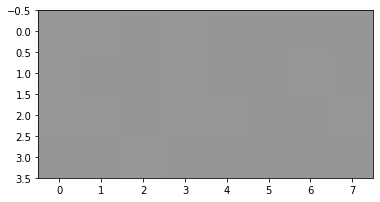

In [54]:
plt.imshow(coded_image)

In [55]:
# grab the coded image segment
coded_image_segment = sl.get_coded_image_segment(coded_image,start_loc,message_length)


In [56]:
coded_image_segment - carrier_segment

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=uint8)

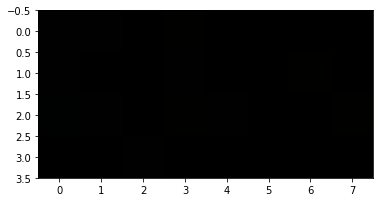

In [57]:
plt.imshow(coded_image - teeny_tiny_pic)

In [58]:
extracted_binary_message = sl.extract_binary_message(coded_image_segment)
extracted_binary_message

'01001000011010010010000001010000011110010111010001101000011011110110111000100001'

In [59]:
decoded_message = sl.convert_back(extracted_binary_message)
decoded_message

'Hi Python!'

In [68]:
# interesting to look at the effects of different images on the message coding process
tiny_random_pic = np.random.randint(255, size=(4, 8, 3))

In [69]:
tiny_random_pic.shape

(4, 8, 3)

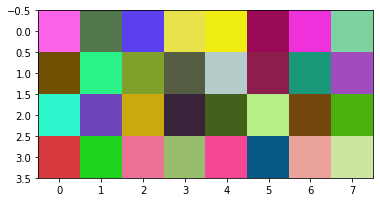

In [70]:
plt.imshow(tiny_random_pic) # will change everytime new tiny_ramdom_pic generated

In [71]:
# do same thing with random image
# NOTE: generating new_carrier_segment
image_vector, new_carrier_segment, length_of_binary, \
    rows, cols, colors = sl.prepare_carrier_segment(tiny_random_pic, \
        binary_message, start_loc)

In [72]:
new_coded_image_segment = sl.insert_message(new_carrier_segment, binary_message, length_of_binary)

In [73]:
# NEW segments (new picture)
new_carrier_segment, new_coded_image_segment

(array([251,  98, 232,  83, 119,  76,  90,  64, 241, 232, 227,  75, 239,
        237,  17, 155,  11,  85, 239,  49, 220, 124, 211, 160, 112,  81,
          3,  43, 242, 134, 127, 161,  44,  85,  94,  66, 181, 204, 202,
        141,  30,  75,  26, 153, 120, 160,  76, 190,  47, 245, 204, 112,
         69, 186, 202, 168,  14,  57,  36,  59,  67,  97,  26, 180, 240,
        134, 117,  70,  14,  74, 176,  13, 215,  57,  62,  30, 211,  29,
        234, 112]),
 array([250,  99, 232,  82, 119,  76,  90,  64, 240, 233, 227,  74, 239,
        236,  16, 155,  10,  84, 239,  48, 220, 124, 210, 160, 112,  81,
          2,  43, 242, 134, 126, 160,  44,  85,  95,  67, 181, 204, 202,
        141,  30,  75,  27, 153, 120, 161,  76, 190,  46, 245, 205, 112,
         69, 186, 202, 168,  14,  57,  37,  58,  67,  97,  27, 181, 240,
        135, 117,  70,  15,  75, 177,  12, 214,  56,  63,  30, 210,  28,
        234, 113], dtype=uint8))

In [74]:
# different "difference" array, because bits shifted up/down differently for new image
new_coded_image_segment - new_carrier_segment 

array([-1,  1,  0, -1,  0,  0,  0,  0, -1,  1,  0, -1,  0, -1, -1,  0, -1,
       -1,  0, -1,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0, -1, -1,  0,  0,
        1,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0, -1,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  1, -1,  0,  0,  1,  1,  0,  1,  0,  0,
        1,  1,  1, -1, -1, -1,  1,  0, -1, -1,  0,  1])

In [75]:
# now back to use the "app", understanding how it works